In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(directory=r"C:\Users\chava\dataset\training_set",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 344 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\chava\dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
        

Found 112 images belonging to 2 classes.


In [6]:
#Initialising the CNN
cnn = tf.keras.models.Sequential()

In [7]:
#Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64,3]))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
#Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
#Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

In [11]:
#Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
#Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
#Part 3 - Training the CNN
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
#Training the CNN on the Training set and evaluating it on the Test set
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
11/11 [==============================] - 6s 422ms/step - loss: 0.7264 - accuracy: 0.5552 - val_loss: 0.6590 - val_accuracy: 0.4286
Epoch 2/20
11/11 [==============================] - 4s 342ms/step - loss: 0.6131 - accuracy: 0.6337 - val_loss: 0.4584 - val_accuracy: 0.7946
Epoch 3/20
11/11 [==============================] - 4s 327ms/step - loss: 0.5061 - accuracy: 0.7674 - val_loss: 0.3306 - val_accuracy: 0.8661
Epoch 4/20
11/11 [==============================] - 4s 333ms/step - loss: 0.4768 - accuracy: 0.7616 - val_loss: 0.2729 - val_accuracy: 0.9554
Epoch 5/20
11/11 [==============================] - 3s 320ms/step - loss: 0.3887 - accuracy: 0.8285 - val_loss: 0.1828 - val_accuracy: 0.9732
Epoch 6/20
11/11 [==============================] - 3s 315ms/step - loss: 0.2638 - accuracy: 0.9070 - val_loss: 0.0777 - val_accuracy: 0.9821
Epoch 7/20
11/11 [==============================] - 3s 319ms/step - loss: 0.2222 - accuracy: 0.9157 - val_loss: 0.0538 - val_accuracy: 0.9911
Epoch 

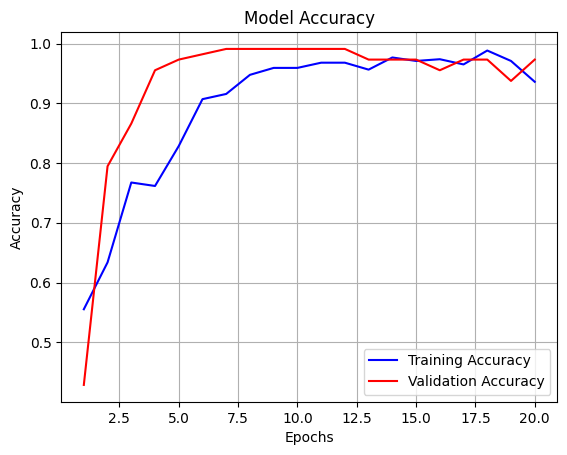

In [15]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create x-axis values (epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Part 4 - Making a single prediction
import numpy as np
from tensorflow.keras.preprocessing import image
#from keras.preprocessing import image
test_image = image.load_img(input('Enter the path / Location of image'), target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result
training_set.class_indices
if result[0][0] == 1:
    prediction = 'No Cancer Detected'
    
else:
    prediction = 'Cancer is Detected'
    
print(prediction)


Enter the path / Location of imageC:\Users\chava\dataset\single_prediction\cancer (2).png
1/1 [==============================] - 0s 146ms/step
Cancer is Detected


In [18]:
from tensorflow.keras.models import save_model

In [20]:
save_model(cnn,'lcd.h5')